In [11]:
# Welcome to our notebook! Here, we will begin to analyze spatial data to learn about landlord acquisition patterns in South LA
## Our research question is: Did LAPD’s implementation of LASER zones in LA’s 77th Division affect rates of criminalization, displacement, and acquisition by new landlords within that area? 

In [12]:
### To start, lets import our necessary libraries and files. Our goal here is to visualize where LLC Landlords are within South LA.

In [13]:
# to download osm dataimport osmnx as ox
import osmnx as ox

# to manipulate and visualize spatial dataimport geopandas as gpd
import geopandas as gpd

# to provide basemaps import contextily as ctx
import contextily as ctx

# to plot things with plotlyimport plotly.express as px
import plotly.express as px

# we import this so we can process this csv file
import pandas as pd

In [14]:
landlords = gpd.read_file('../data/South LA Neighborhood Data/South_Central_Landlords.csv')

In [15]:
# how many columns/rows does it have?
landlords.shape

(325, 9)

In [16]:
## Exploring the data 

In [17]:
# what does the data look like?

landlords.head()

Purchase Date           Site Address Site Zip Code    Longitude   Latitude  \
0        9/4/20          711 W 82nd St         90044  -118.285887  33.964626   
1        9/4/20          707 W 82nd St         90044  -118.285722  33.964627   
2        9/4/20  6410 N Paramount Blvd         90805  -118.159624  33.871199   
3        7/9/20         1411 E 53rd St         90011  -118.249606  33.995101   
4        7/9/20         1413 E 53rd St         90011  -118.249738  33.995101   

   1st Owner's First Name 2nd Owners Name Number of Units geometry  
0  Sola Impact Fund Ii Lp     SOLA Impact               6     None  
1  Sola Impact Fund Ii Lp     SOLA Impact               6     None  
2     Sola Impact Fund Lp     SOLA Impact              15     None  
3  1411 E 53rd Street Llc   Navid Yadegar               5     None  
4  1411 E 53rd Street Llc   Navid Yadegar               5     None

In [18]:
# check to see how many columns have all null values
landlords.columns[landlords.isna().all()].tolist()

['geometry']

In [19]:
# we don't need the geometry column so let's drop that and make sure the code worked
columns_to_drop = ['geometry']

landlords_trim = landlords.drop(columns_to_drop,axis=1)
landlords_trim.head()

Purchase Date           Site Address Site Zip Code    Longitude   Latitude  \
0        9/4/20          711 W 82nd St         90044  -118.285887  33.964626   
1        9/4/20          707 W 82nd St         90044  -118.285722  33.964627   
2        9/4/20  6410 N Paramount Blvd         90805  -118.159624  33.871199   
3        7/9/20         1411 E 53rd St         90011  -118.249606  33.995101   
4        7/9/20         1413 E 53rd St         90011  -118.249738  33.995101   

   1st Owner's First Name 2nd Owners Name Number of Units  
0  Sola Impact Fund Ii Lp     SOLA Impact               6  
1  Sola Impact Fund Ii Lp     SOLA Impact               6  
2     Sola Impact Fund Lp     SOLA Impact              15  
3  1411 E 53rd Street Llc   Navid Yadegar               5  
4  1411 E 53rd Street Llc   Navid Yadegar               5

In [20]:
# let's see a sample of 5 values as well to poke around the data.

landlords.sample(5)

Purchase Date       Site Address Site Zip Code    Longitude   Latitude  \
152       1/29/18     3712 Maple Ave         90011  -118.270951  34.014322   
285        5/9/12  349 E 80th St 1-4         90003  -118.267783   33.96673   
266       5/15/13      6320 11th Ave         90043  -118.328954  33.982278   
191        7/3/17      528 W 78th St         90044   -118.28374   33.96854   
168       12/1/17    1212 W 107th St         90044  -118.296724  33.938477   

      1st Owner's First Name         2nd Owners Name Number of Units geometry  
152   Sola Impact Fund Ii Lp             SOLA Impact               6     None  
285   Haroni Investments Llc  Haroni Investments LLC               4     None  
266  Mid City Apartments Llc          Dan Zuckerman               12     None  
191      Sola Impact Fund Ii             SOLA Impact               8     None  
168     Gb Portfolio Iii Llc          David Berneman              22     None

In [21]:
## Mapping the data

In [25]:
# why not start mapping now? this is a pandas dataframe and we want to convert it to a geodataframe; we'll need to define which columns will be our lat and long; we are using the WGS84 geographic coordinate system

landlords_trim = gpd.GeoDataFrame(landlords_trim, 
                                     crs="EPSG:4326",
                                     geometry=gpd.points_from_xy(landlords_trim.Longitude, landlords_trim.Latitude))

In [26]:
# Now, we reproject it to a web mercator projection to allow contextily tiles to work as a base layer

landlords_trim = landlords_trim.to_crs(epsg=3857)

In [28]:
# let's rename the columns in order to project the maps

columns = list(landlords_trim) 
columns

['Purchase Date',
 'Site Address',
 'Site Zip Code',
 'Longitude',
 'Latitude',
 "1st Owner's First Name",
 '2nd Owners Name',
 'Number of Units',
 'geometry']

In [29]:
# now that we've listed them, let's rename them

landlords_trim.columns = ['Purchase Date',
 'Site Address',
 'Site Zip Code',
 'Longitude',
 'Latitude',
 "First Owners Name",
 '2nd Owners Name',
 'Number of Units',
 'geometry']

In [30]:
# okay, let's make sure that worked

landlords_trim.head()

Purchase Date           Site Address Site Zip Code    Longitude   Latitude  \
0        9/4/20          711 W 82nd St         90044  -118.285887  33.964626   
1        9/4/20          707 W 82nd St         90044  -118.285722  33.964627   
2        9/4/20  6410 N Paramount Blvd         90805  -118.159624  33.871199   
3        7/9/20         1411 E 53rd St         90011  -118.249606  33.995101   
4        7/9/20         1413 E 53rd St         90011  -118.249738  33.995101   

        First Owners Name 2nd Owners Name Number of Units  \
0  Sola Impact Fund Ii Lp     SOLA Impact               6   
1  Sola Impact Fund Ii Lp     SOLA Impact               6   
2     Sola Impact Fund Lp     SOLA Impact              15   
3  1411 E 53rd Street Llc   Navid Yadegar               5   
4  1411 E 53rd Street Llc   Navid Yadegar               5   

                            geometry  
0  POINT (-13167524.709 4024053.151)  
1  POINT (-13167506.341 4024053.285)  
2  POINT (-13153469.176 4011520.283)  
3  POINT (-13163485.926 4028144.229)  
4  POINT (-13163500.621 4028144.229)

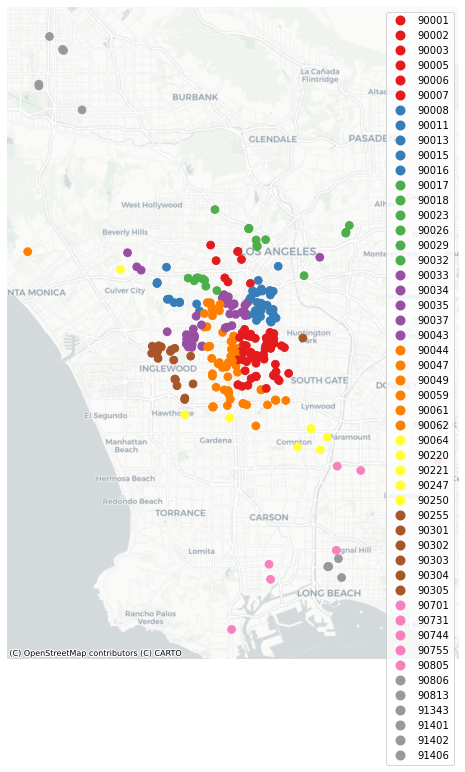

In [31]:
# okay, let's map it now.

ax = landlords_trim.plot(figsize=(12,12),
                              column='Site Zip Code',
                              legend=True,
                              cmap='Set1',
                             markersize=60)


            
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)



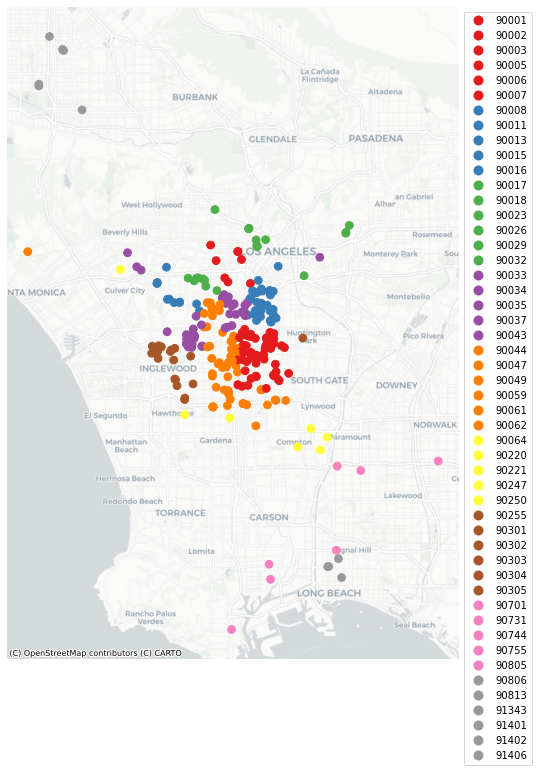

In [32]:
# Great! Now let's try moving the legend to the right

ax = landlords_trim.plot(figsize=(12,12),
                              column='Site Zip Code',
                              legend=True,
                              cmap='Set1',
                             markersize=60,
                         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)}) 


            
ax.axis('off')
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)
 

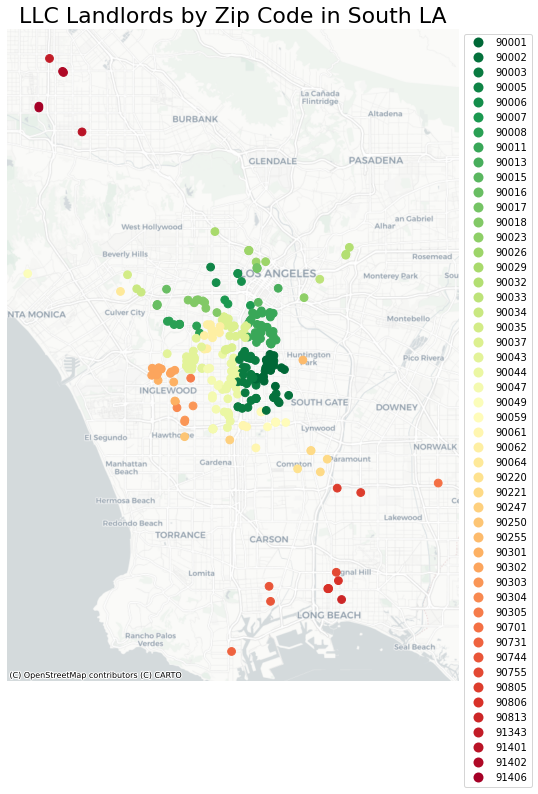

In [33]:
# okay. now let's try adding a title and messing around with the colors

ax = landlords_trim.plot(figsize=(12,12),
                              column='Site Zip Code',
                              legend=True,
                              cmap='RdYlGn_r',
                             markersize=60,
                         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax.axis('off')
ax.set_title('LLC Landlords by Zip Code in South LA',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)


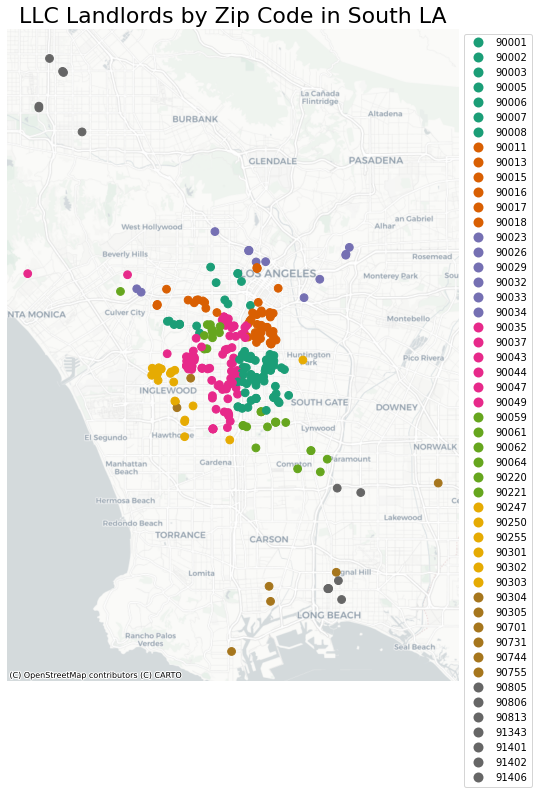

In [34]:
# that color scheme doesn't make sense; let's try changing the color again

ax = landlords_trim.plot(figsize=(12,12),
                              column='Site Zip Code',
                              legend=True,
                              cmap='Dark2',
                             markersize=60,
                         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,1)})

ax.axis('off')
ax.set_title('LLC Landlords by Zip Code in South LA',fontsize=22)
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [35]:
# Wow, so actually this shows that we have some data that falls outside South LA. We'll need to trim that out at some point.
# For now,- let's take a closer look at the columns and data to understand any trends; let's look at how many LLC Landlords are in each zip code

px.bar(landlords,
       x='Site Zip Code',
       title='LLC Landlords by Zip Code in South LA'
      )

In [36]:
# this bar graph is really hard to see; plus, it's showing the zip codes as numbers rather than categories

# Create a figure from the Enviro LA data frame where the score is greater than 73.12 (the top 10)
fig = px.bar(landlords,
       x='Site Zip Code',
       title='LLC Landlords by Zip Code in South LA'
      )

# force the chart to show the census tract as a category <--- THIS IS THE MAGIC TRICK THAT MAKES IT WORK
fig.update_layout(xaxis=dict(type='category'))

fig.show()

In [37]:
## it worked! now we can see that zip codes 90003, 90043, 90011, 90044, 90001, and 90037 have the most LLC landlords in this list

In [38]:
# perhaps it would look better if we visualized the data as a chart instead

# Now make a data frame that summarizes the number of LLC Landlords in each zip code
landlords_zipcodes = landlords_trim['Site Zip Code'].value_counts().reset_index()

# Adjust the column headers so the names match the values below
landlords_zipcodes.columns = ['Site Zip Code', 'Count']

# Show me the top 25
landlords_zipcodes.head(25)

Site Zip Code  Count
0          90003     39
1          90043     38
2          90011     32
3          90044     31
4          90001     23
5          90037     22
6          90302     13
7          90047     12
8          90062     11
9          90018      8
10         90002      8
11         90008      8
12         90059      8
13         90026      5
14         90016      4
15         90301      4
16         90061      4
17         90006      4
18         90806      4
19         90221      4
20         90303      3
21         90017      3
22         90032      3
23         90007      3
24         90805      2

In [39]:
# this confirms our previous analysis from the bar graph, but now we have a solid count of how many are in each zip code. great!

# let's now try mapping just the top 10 zip codes, which end up actually including 13 zip codes since the last 4 each have 8 LLC Landlords there

fig = px.bar(landlords_zipcodes.head(14),
            x='Site Zip Code', 
            y='Count', 
            hover_data=['Count'], 
            color='Count', 
            height=500,
            title='Top 13 Zip Codes with LLC Landlords in South LA'
            )

# now let's force the chart to show the zip code as a category rather than a number
fig.update_layout(xaxis=dict(type='category'))

fig.show()

In [40]:
# amazing! let's change the color again

fig.update_traces(marker_color='teal')

In [ ]:
# ..and we have charts and maps! Our next step is now to to try trimming data only to show those within the 77th LAPD Division.
# Next, we can hopefully overlay this with census data that we've compiled.

In [ ]:
# Cynthia conducted the data exploration and mapping for LA_crime. She also downloaded relevant data for this
# Gerrlyn conducted the data exploration and mapping for landlord acquisitions and cleaned the census data for our region. She also downloaded all census data.
# Powerpoint presentation was done jointly.